<a href="https://colab.research.google.com/github/vodnalashiva131/INFO-5731/blob/main/Vodnala_Shiva_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import re
import pandas as pd
import nltk
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to tokenize text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Function to calculate N-gram frequencies
def calculate_ngram_freq(tokens, N):
    ngrams = zip(*[tokens[i:] for i in range(N)])
    return Counter([' '.join(ngram) for ngram in ngrams])

# Function to calculate bigram probabilities
def calculate_bigram_prob(tokens):
    bigrams = zip(tokens, tokens[1:])
    freq_bigrams = Counter(bigrams)
    freq_unigrams = Counter(tokens)
    return {bigram: freq_bigrams[bigram] / freq_unigrams[bigram[0]] for bigram in freq_bigrams}

# Function to extract noun phrases
def extract_noun_phrases(text):
    grammar = r"NP: {<DT|JJ|NN.*>+}"
    chunk_parser = nltk.RegexpParser(grammar)
    tagged_tokens = nltk.pos_tag(tokenize(text))
    tree = chunk_parser.parse(tagged_tokens)
    return [' '.join([word for word, tag in subtree.leaves()]) for subtree in tree.subtrees() if subtree.label() == 'NP']

# Function to calculate relative probabilities of noun phrases
def calculate_relative_probabilities(dataset):
    all_noun_phrases = [noun_phrase for text in dataset for noun_phrase in extract_noun_phrases(text)]
    max_freq = Counter(all_noun_phrases).most_common(1)[0][1]
    return [{noun_phrase: Counter(all_noun_phrases)[noun_phrase] / max_freq for noun_phrase in extract_noun_phrases(text)} for text in dataset]

# Read dataset from CSV using Pandas
df = pd.read_csv('papers.csv')

# Drop null values
df.dropna(inplace=True)

# Extract abstracts
abstracts = df['Abstract'].tolist()

# Step 1: Count the frequency of all the N-grams (N=3)
ngram_freq = calculate_ngram_freq(tokenize(' '.join(abstracts)), 3)

# Step 2: Calculate the probabilities for all the bigrams
tokens = tokenize(' '.join(abstracts))
bigram_prob = calculate_bigram_prob(tokens)

# Step 3: Extract all the noun phrases and calculate the relative probabilities
relative_probs = calculate_relative_probabilities(abstracts)

# Save the results in a single file
with open('nlp_results.txt', 'w') as f:
    f.write("N-gram frequencies:\n")
    f.write(str(ngram_freq) + "\n\n")
    f.write("Bigram probabilities:\n")
    f.write(str(bigram_prob) + "\n\n")
    f.write("Relative probabilities of noun phrases:\n")
    for i, probs in enumerate(relative_probs):
        f.write(f"Review {i + 1}:\n")
        f.write(str(probs) + "\n\n")

# Show only a few lines of the results
with open('nlp_results.txt', 'r') as f:
    print(f.read()[:5])  # Show only the first 5 characters for demonstration

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [2]:
import re
import pandas as pd
import nltk
import math

# tokenizing text Function
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

#calculating term frequency (TF)
def calculate_tf(text):
    tokens = tokenize(text)
    tf = {}
    total_tokens = len(tokens)
    for token in tokens:
        tf[token] = tf.get(token, 0) + 1 / total_tokens
    return tf

# calculating the inverse document frequency (IDF)
def calculate_idf(documents):
    num_documents = len(documents)
    idf = {}
    for document in documents:
        tokens = set(tokenize(document))
        for token in tokens:
            idf[token] = idf.get(token, 0) + 1
    for token, freq in idf.items():
        idf[token] = math.log(num_documents / freq)
    return idf

# calculating the TF-IDF for each document
def calculate_tfidf(documents, idf):
    tfidf_docs = []
    for document in documents:
        tf = calculate_tf(document)
        tfidf = {token: tf[token] * idf.get(token, 0) for token in tf}
        tfidf_docs.append(tfidf)
    return tfidf_docs

# calculating the cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1[token] * vector2[token] for token in vector1 if token in vector2)
    magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

#Defining a query
query = "low cost data handling"

# Reading the dataset from CSV using Pandas
df = pd.read_csv('papers.csv')

# Droping all the null values
df.dropna(inplace=True)

# Extracting abstracts
abstracts = df['Abstract'].tolist()

# Calculating IDF for the dataset
idf = calculate_idf(abstracts)

# Calculating TF-IDF for each document
tfidf_docs = calculate_tfidf(abstracts, idf)

# Vectorize the query using TF-IDF
query_vector = calculate_tf(query)
query_vector = {token: query_vector[token] * idf.get(token, 0) for token in query_vector}

# Calculating cosine similarity between query and each document
similarities = [(i+1, cosine_similarity(query_vector, tfidf_docs[i])) for i in range(len(tfidf_docs))]

# Ranking documents based on cosine similarity
ranked_documents = sorted(similarities, key=lambda x: x[1], reverse=True)

# Printing document rankings
print("Document Rankings:")
for rank, (doc_index, similarity) in enumerate(ranked_documents, 1):
    print(f"Rank {rank}: Document {doc_index}, Similarity: {similarity:.4f}")

Streaming output truncated to the last 5000 lines.
Rank 3710: Document 8672, Similarity: 0.0000
Rank 3711: Document 5526, Similarity: 0.0000
Rank 3712: Document 375, Similarity: 0.0000
Rank 3713: Document 7216, Similarity: 0.0000
Rank 3714: Document 1098, Similarity: 0.0000
Rank 3715: Document 1807, Similarity: 0.0000
Rank 3716: Document 2641, Similarity: 0.0000
Rank 3717: Document 4962, Similarity: 0.0000
Rank 3718: Document 4889, Similarity: 0.0000
Rank 3719: Document 5577, Similarity: 0.0000
Rank 3720: Document 719, Similarity: 0.0000
Rank 3721: Document 2305, Similarity: 0.0000
Rank 3722: Document 5013, Similarity: 0.0000
Rank 3723: Document 5039, Similarity: 0.0000
Rank 3724: Document 395, Similarity: 0.0000
Rank 3725: Document 8561, Similarity: 0.0000
Rank 3726: Document 4486, Similarity: 0.0000
Rank 3727: Document 403, Similarity: 0.0000
Rank 3728: Document 3600, Similarity: 0.0000
Rank 3729: Document 1517, Similarity: 0.0000
Rank 3730: Document 980, Similarity: 0.0000
Rank 3731

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [4]:
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk

# Download NLTK resources
nltk.download('punkt')

# Reading dataset from CSV using Pandas
df = pd.read_csv('papers.csv')

# Droping the null values
df.dropna(inplace=True)

# Extracting the abstracts
abstracts = df['Abstract'].tolist()

# Preprocessing text and tokenize
preprocessed_abstracts = [word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) for abstract in abstracts]

# Training Word2Vec model
model = Word2Vec(sentences=preprocessed_abstracts, vector_size=300, window=5, min_count=1, workers=4)

# Saving the model
model.save("word2vec_model.bin")

# Loading the  model
# model = Word2Vec.load("word2vec_model.bin")

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Choosing the  words to visualize
words_to_visualize = ['design', 'cost', 'data', 'handling', 'space', 'satellites']

# Geting word vectors
word_vectors = [model.wv[word] for word in words_to_visualize]

import numpy as np

# Converting list of word vectors to 2D numpy array
word_vectors_array = np.array(word_vectors)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


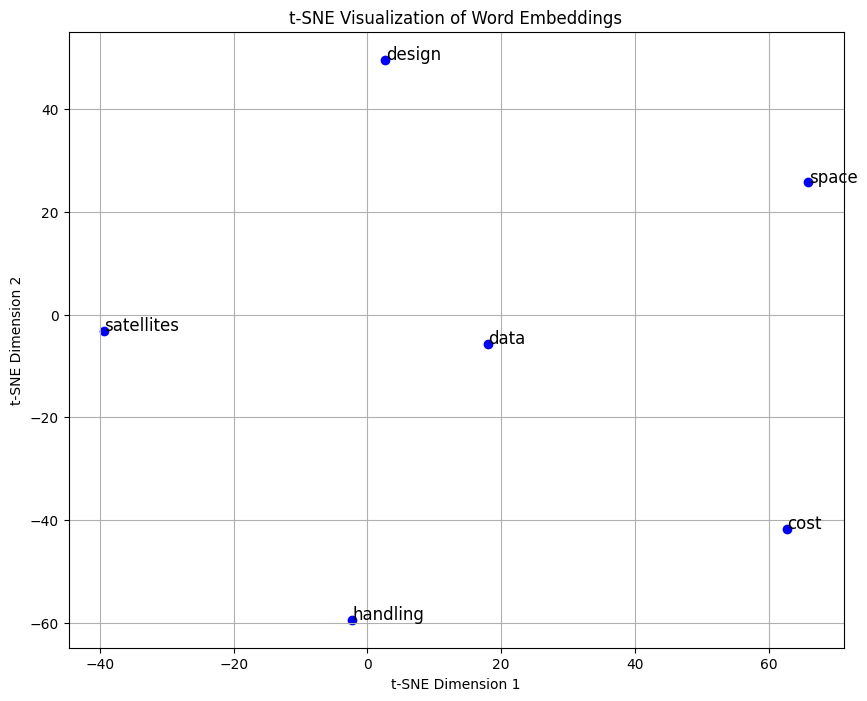

In [ ]:
# Performing t-SNE dimensionality reduction with reduced perplexity
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Set perplexity to a lower value (e.g., 5)
word_vectors_tsne = tsne.fit_transform(word_vectors_array)

# Ploting the figure
plt.figure(figsize=(10, 8))
for i, word in enumerate(words_to_visualize):
    plt.scatter(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1], marker='o', color='blue')
    plt.text(word_vectors_tsne[i, 0] + 0.05, word_vectors_tsne[i, 1] + 0.05, word, fontsize=12)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings')
plt.grid(True)
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link 1: https://github.com/vodnalashiva131/INFO-5731/blob/main/papers.csv
# Link 2: https://github.com/vodnalashiva131/INFO-5731/blob/main/annotated_papers.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
'''
The assignment was handy; it ‘walked’ me through the array of NLP methods ranging from n-gram analysis to the more complex tasks like creation on word embedding model. Although we were experiencing some difficulties in data preprocessing and algorithm implementation, amidst these complexities, I felt a sense of pride while discovering those intricacies of NLP. Among all the activities what seemed to be the most fun was to see the results what were actually imparting some clear data tendencies. Succeeding at this task called for a good grasp of time management, which was essential in overcoming the difficulties inherent in algorithm building and addressing all the messy creative tasks while sticking to the scheduled time. Breaking down the structure of natural language, the construction of computer programs, understanding how a machine reads and comprehends, data analysis and interpretation skills were considerably enhanced by this exercise.
'''

'\nThe assignment was handy; it ‘walked’ me through the array of NLP methods ranging from n-gram analysis to the more complex tasks like creation on word embedding model. Although we were experiencing some difficulties in data preprocessing and algorithm implementation, amidst these complexities, I felt a sense of pride while discovering those intricacies of NLP. Among all the activities what seemed to be the most fun was to see the results what were actually imparting some clear data tendencies. Succeeding at this task called for a good grasp of time management, which was essential in overcoming the difficulties inherent in algorithm building and addressing all the messy creative tasks while sticking to the scheduled time. Breaking down the structure of natural language, the construction of computer programs, understanding how a machine reads and comprehends, data analysis and interpretation skills were considerably enhanced by this exercise.\n'